# Aviation Accidents

## Import Libraries

In [1]:
import scipy
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

## Data Dictionary

## Exploratory Data Analysis

Read in the data...

In [2]:
data = pd.read_csv("table10_2014.csv")
print(data.index)
print(data.dtypes)
print(data.shape)

RangeIndex(start=0, stop=65, step=1)
Table 10.  Accidents, Fatalities, and Rates, 1995 through 2014,     object
Unnamed: 1                                                          object
Unnamed: 2                                                          object
Unnamed: 3                                                          object
Unnamed: 4                                                          object
Unnamed: 5                                                          object
Unnamed: 6                                                          object
Unnamed: 7                                                          object
Unnamed: 8                                                         float64
Unnamed: 9                                                         float64
dtype: object
(65, 10)


Take a look...

In [3]:
print("First 20 rows:")
print(data.head(20))

First 20 rows:
   Table 10.  Accidents, Fatalities, and Rates, 1995 through 2014,  \
0                               U.S. General Aviation                
1                                                 NaN                
2                                                 NaN                
3                                                Year                
4                                                1975                
5                                                1976                
6                                                1977                
7                                                1978                
8                                                1979                
9                                                1980                
10                                               1981                
11                                               1982                
12                                               1983                
13   

In [4]:
print("Last 20 rows:")
print(data.tail(20))

Last 20 rows:
   Table 10.  Accidents, Fatalities, and Rates, 1995 through 2014, Unnamed: 1  \
45                                              Notes                     NaN   
46                                                NaN                     NaN   
47                                                NaN                     NaN   
48                                                NaN                     NaN   
49                                                NaN                     NaN   
50                                                NaN                     NaN   
51                                                NaN                     NaN   
52                                                NaN                     NaN   
53                                                NaN                     NaN   
54                                                NaN                     NaN   
55                                                NaN                     NaN   
56            

So apparently this dataset has notes at the bottom of it as well as headers and subheaders. First I'm going to trim those off, and then I'll add in my own headers.

In [5]:
data = data[4:-21]
data.head()

,"Table 10. Accidents, Fatalities, and Rates, 1995 through 2014,",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
4,1975,3995,633,1252,1231,"28,799,000",13.87,2.19,NaN,NaN
5,1976,4018,658,1216,1203,"30,476,000",13.17,2.16,NaN,NaN
6,1977,4079,661,1276,1265,"31,578,000",12.91,2.09,NaN,NaN
7,1978,4216,719,1556,1398,"34,887,000",12.08,2.06,NaN,NaN
8,1979,3818,631,1221,1203,"38,641,000",9.88,1.63,NaN,NaN


In [6]:
headers = ['Year', 'All Accidents', 'Fatal Accidents', 'Total Fatalities', 'Fatalities Aboard', 'Flight Hours', 'All Accidents Per 100,000 Flight Hours', 'Fatal Accidents Per 100,000 Flight Hours', '', '']
# So it turns out there's two sneaky columns in here that're totally empty.
# I'm going to give them empty headers for now, and delete them when I'm done with headers.
data.columns = headers
data.head()

,Year,All Accidents,Fatal Accidents,Total Fatalities,Fatalities Aboard,Flight Hours,"All Accidents Per 100,000 Flight Hours","Fatal Accidents Per 100,000 Flight Hours",,
4,1975,3995,633,1252,1231,"28,799,000",13.87,2.19,NaN,NaN
5,1976,4018,658,1216,1203,"30,476,000",13.17,2.16,NaN,NaN
6,1977,4079,661,1276,1265,"31,578,000",12.91,2.09,NaN,NaN
7,1978,4216,719,1556,1398,"34,887,000",12.08,2.06,NaN,NaN
8,1979,3818,631,1221,1203,"38,641,000",9.88,1.63,NaN,NaN


In [7]:
data = data.drop(columns=[''])

Yay! Looks like this dataset is finally in good shape!!!

## Summary Statistics 

In [8]:
data.describe()

,Year,All Accidents,Fatal Accidents,Total Fatalities,Fatalities Aboard,Flight Hours,"All Accidents Per 100,000 Flight Hours","Fatal Accidents Per 100,000 Flight Hours"
count,40,40,40,40,40,40,40,40
unique,40,38,39,39,38,40,40,35
top,1976,"1,470",345,496,1203,"28,322,000",7.43,1.63
freq,1,2,2,2,2,1,1,3


In [9]:
# Find the percentage of accidents that are fatal
# fatal_percentage = float(data['All Accidents'].sum()) / float(data['Fatal Accidents'].sum())
# print('%0.f percent of accidents were fatal'%fatal_percentage)
data['All Accidents'].sum()

'3995401840794216381835903500 3,233  3,075  3,017  2,739  2,581  2,494  2,388  2,242  2,242  2,197  2,110  2,064  2,021 2,0561,9081,8401,9021,9051,8371,7271,7161,7411,6191,6711,5231,6541,5681,4801,4401,4701,4701,2241,221'

In trying to find what percentage of accidents were fatal, I discovered that the values in this dataset have commas. I will need to take out the commas and try again.

In [10]:
data['All Accidents'] = data['All Accidents'].str.replace(',', '')
data['All Accidents'] = data['All Accidents'].astype(int)

data['Fatal Accidents'] = data['Fatal Accidents'].str.replace(',', '')
data['Fatal Accidents'] = data['Fatal Accidents'].astype(int)

# be as well doing this for all columns, will need them at some point.
data['Flight Hours'] = data['Flight Hours'].str.replace(',', '')
data['Flight Hours'] = data['Flight Hours'].str.replace(' - ', '')
data.loc[data['Flight Hours'] == '']
data = data.drop(data[data['Flight Hours'] == ''].index)
data['Flight Hours'] = data['Flight Hours'].astype(int)

data['Total Fatalities'] = data['Total Fatalities'].str.replace(',', '')
data['Total Fatalities'] = data['Total Fatalities'].astype(int)

data['Fatalities Aboard'] = data['Fatalities Aboard'].str.replace(',', '')
data['Fatalities Aboard'] = data['Fatalities Aboard'].astype(int)

data['All Accidents Per 100,000 Flight Hours'] = data['All Accidents Per 100,000 Flight Hours'].str.replace(',', '')
data['All Accidents Per 100,000 Flight Hours'] = data['All Accidents Per 100,000 Flight Hours'].astype(float)

data['Fatal Accidents Per 100,000 Flight Hours'] = data['Fatal Accidents Per 100,000 Flight Hours'].str.replace(',', '')
data['Fatal Accidents Per 100,000 Flight Hours'] = data['Fatal Accidents Per 100,000 Flight Hours'].astype(float)

,Year,All Accidents,Fatal Accidents,Total Fatalities,Fatalities Aboard,Flight Hours,"All Accidents Per 100,000 Flight Hours","Fatal Accidents Per 100,000 Flight Hours"
4,1975,3995,633,1252,1231,28799000,13.87,2.19
5,1976,4018,658,1216,1203,30476000,13.17,2.16
6,1977,4079,661,1276,1265,31578000,12.91,2.09
7,1978,4216,719,1556,1398,34887000,12.08,2.06
8,1979,3818,631,1221,1203,38641000,9.88,1.63


In [11]:
# Find the percentage of accidents that are fatal
fatal_percentage = float(data['All Accidents'].sum()) / float(data['Fatal Accidents'].sum())
print('%0.f percent of accidents were fatal'%fatal_percentage)

5 percent of accidents were fatal


## Feature Engineering

I don't actually have any columns I'd like to feature engineer right now.

## Plots And Graphs

In [12]:
data.columns

Index(['Year', 'All Accidents', 'Fatal Accidents', 'Total Fatalities',
       'Fatalities Aboard', 'Flight Hours',
       'All Accidents Per 100,000 Flight Hours',
       'Fatal Accidents Per 100,000 Flight Hours'],
      dtype='object')

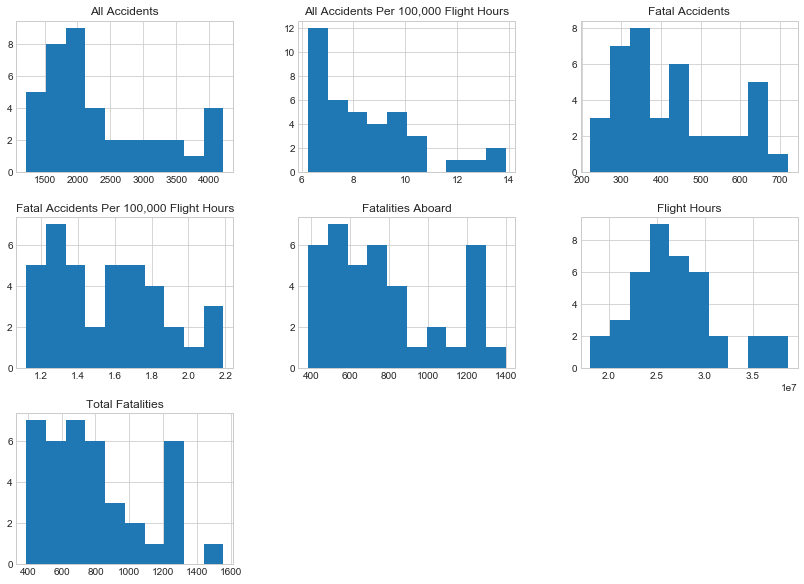

In [13]:
data.hist(bins = 10, figsize=(14, 10))
plt.show()

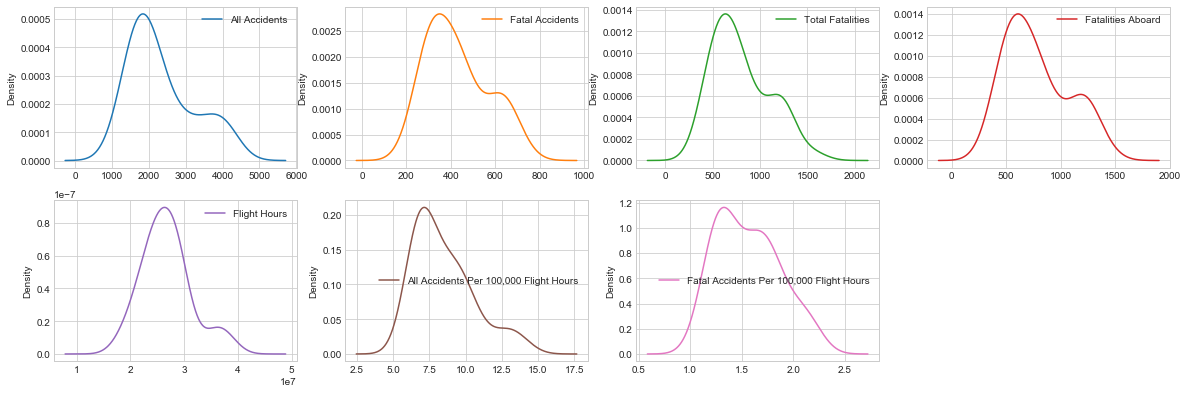

In [14]:
data.plot(kind='density', figsize=(20, 35), layout=(10,4), subplots=True, sharex=False) 
plt.show()

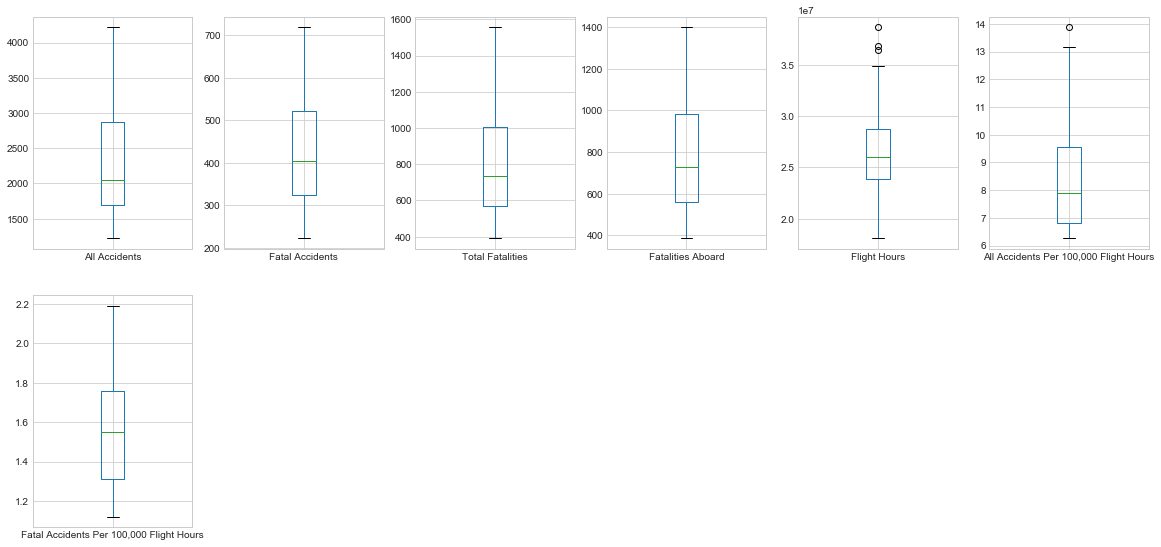

In [15]:
data.plot(kind='box', subplots=True, figsize=(20, 35), layout=(7,6), sharex=False, sharey=False) 
plt.show()

In [16]:
data.corr()

,All Accidents,Fatal Accidents,Total Fatalities,Fatalities Aboard,Flight Hours,"All Accidents Per 100,000 Flight Hours","Fatal Accidents Per 100,000 Flight Hours"
All Accidents,1.000000,0.984255,0.974336,0.981982,0.848684,0.932052,0.866560
Fatal Accidents,0.984255,1.000000,0.988424,0.996124,0.861025,0.908696,0.891501
Total Fatalities,0.974336,0.988424,1.000000,0.993282,0.851369,0.894743,0.875240
Fatalities Aboard,0.981982,0.996124,0.993282,1.000000,0.857956,0.905684,0.885841
Flight Hours,0.848684,0.861025,0.851369,0.857956,1.000000,0.607834,0.545416
"All Accidents Per 100,000 Flight Hours",0.932052,0.908696,0.894743,0.905684,0.607834,1.000000,0.956398
"Fatal Accidents Per 100,000 Flight Hours",0.866560,0.891501,0.875240,0.885841,0.545416,0.956398,1.000000


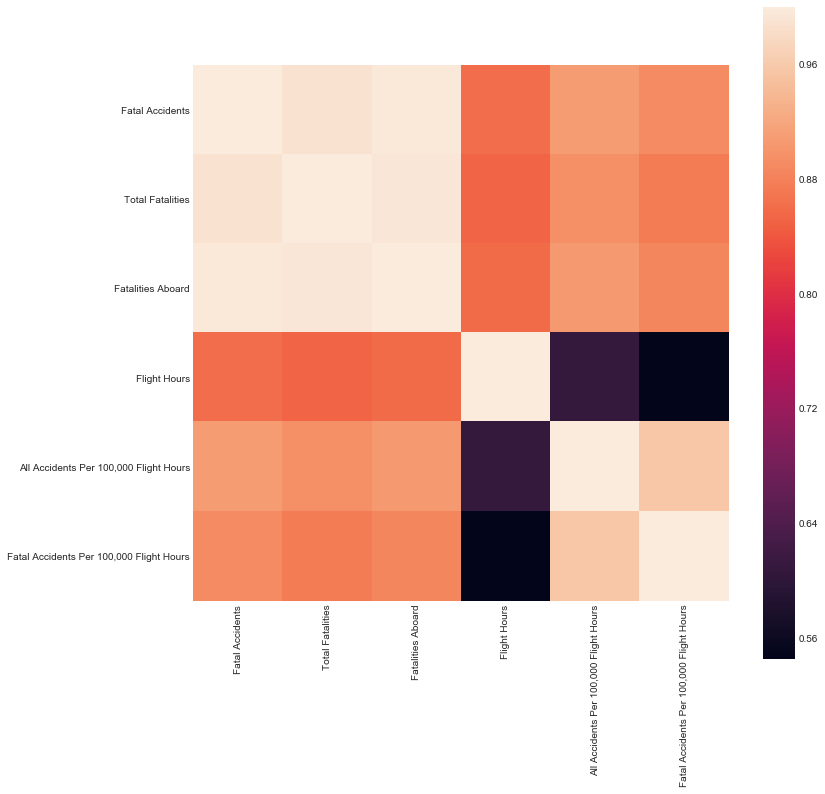

In [17]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

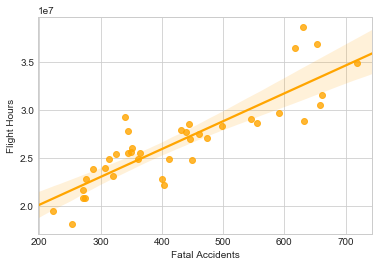

In [19]:
sns.regplot(x = 'Fatal Accidents', y = 'Flight Hours', data = data, color = 'Orange');

## Build A Model

In [ ]:
import statsmodels.api as sm

lm = LogisticRegression()

X = data[['', '', '', '', '']]
X = sm.add_constant(X) # what is this
y = data['']

lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

`````````````````````````````

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['', '', '', '', '']]
y = X['']
X.drop('', axis=1, inplace=True)

model.fit(X, y)

``````````````````````````````



## Conclusion